### final contribution to cv4vr project

In [4]:
import json
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

(640, 640, 3)


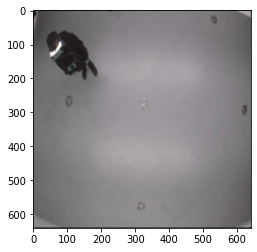

In [55]:
# load an image: 
img = '/Users/felipeparodi/Documents/projects/open-phen/data/openphen-detection-labels/top-detection/test/8_2019-03-22T17_59_15_cam1_mp4-80_jpg.rf.5bd916c8575345a37acca12b386fbc70.jpg'
img = cv2.imread(img)
# show image
plt.imshow(img)

# print image shape
print(img.shape)

True

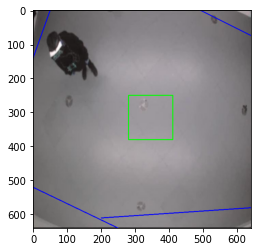

In [57]:
# draw the 3 lines for each region:
cv2.line(img, (0, 140), (50, 0), (0, 0, 255), 2)
cv2.line(img, (0, 520), (250, 640), (0, 0, 255), 2)
cv2.line(img, (200, 610), (640,580), (0, 0, 255), 2)
cv2.line(img, (490, 0), (640,75), (0, 0, 255), 2)
# center:
# top left is (280, 290)
# top right is (430, 20)
# bottom left is (280, 420)
# bottom right is (430, 420)
cv2.rectangle(img, (280, 250), (410, 380), (0, 255,0), 2)
plt.imshow(img)
# save image:
cv2.imwrite('/Users/felipeparodi/Documents/projects/open-phen/data/imagewithlines.jpg', img)

True

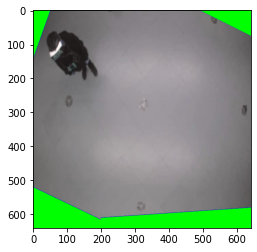

In [60]:
# define the points of the three triangles
pts0 = np.array([[0, 140], [50, 0], [0, 0]], np.int32)
pts1 = np.array([[0, 640], [0, 520], [250, 640]], np.int32)
pts2 = np.array([[200, 610], [640, 580], [640, 640], [200, 640]], np.int32)
pts3 = np.array([[640, 0], [490, 0], [640, 75]], np.int32)

# reshape points for fillPoly
pts0 = pts0.reshape((-1, 1, 2))
pts1 = pts1.reshape((-1, 1, 2))
pts2 = pts2.reshape((-1, 1, 2))
pts3 = pts3.reshape((-1, 1, 2))

# fill the regions
cv2.fillPoly(img, [pts0], (0, 255, 0))
cv2.fillPoly(img, [pts1], (0, 255, 0))
cv2.fillPoly(img, [pts2], (0, 255, 0))
cv2.fillPoly(img, [pts3], (0, 255, 0))

# display the image
plt.imshow(img)
# save image:
cv2.imwrite('/Users/felipeparodi/Documents/projects/open-phen/data/imagewithregions.jpg', img)


In [20]:
# load json file
json_file = '/Users/felipeparodi/Documents/projects/open-phen/results/topdown_results/opf_cam1_trackingdata.json'
with open(json_file) as f:
    data = json.load(f)

# convert json to pandas dataframe
df = pd.DataFrame(data)
df.head()

,subject,anxiety,undetected,centers,smoothed_centers,wallnearness,centeredness,avg_velocity,median_velocity
0,1,14,0.000000,"[[52.7731084377, 63.0212104917], [53.014316052...","[[53.0143160522, 49.7056732178], [52.898151144...",78.228001,0.030239,23.008734,6.100735
1,13,0,14.592275,"[[53.8786425591, 60.216973871], [54.1746902466...","[[54.1746902466, 58.6469940543], [54.168163852...",48.057940,27.478541,34.518254,3.923909
2,17,7,0.513622,"[[28.1408571005, 37.6911541224], [28.993942022...","[[29.4642405957, 39.1755383015], [29.479397565...",63.823135,8.954891,47.037235,9.272561
3,18,10,0.000000,"[[34.6476516724, 145.5383453369], [34.41876220...","[[34.418762207, 147.573928833], [34.5332069397...",25.910364,0.000000,15.023622,3.664398
4,19,4,6.534688,"[[53.2050577998, 106.4136047363], [53.00095105...","[[51.7043056488, 116.8967761993], [51.69662989...",61.317449,0.000000,43.404441,6.604156


In [21]:
# get subjects 17 and 25 as separate dataframe:
df17 = df[df['subject'] == 17]
df25 = df[df['subject'] == 25]

30.8648747486


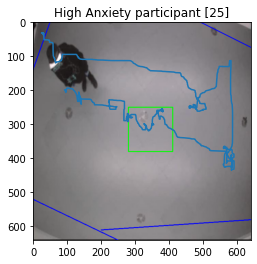

In [65]:
# cast centers column of df25 to list and then to numpy array and plot:
subject25_origwallnearness = df25['wallnearness'].tolist()[0]
print(subject25_origwallnearness)
centers25 = df25['smoothed_centers'].tolist()
centers25 = np.array(centers25[0])
plt.plot(centers25[:,0], centers25[:,1])
top_left = (280, 250)
bottom_right = (410, 380)
# add rectangle:
cv2.rectangle(img, top_left, bottom_right, (0, 255,0), 2)
# display the image
plt.imshow(img)
# set axes to 0,640
plt.xlim(0,640)
plt.ylim(0,640)
plt.gca().invert_yaxis()
plt.title('High Anxiety participant [25]')
# save as pdf:
plt.savefig('/Users/felipeparodi/Documents/projects/open-phen/data/centers25.pdf')

63.8231353283


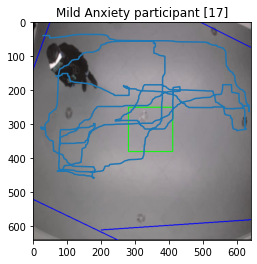

In [64]:
# cast centers column of df17 to list and then to numpy array and plot:
# print wallnearness value:
subject17_origwallnearness = df17['wallnearness'].tolist()[0]
print(subject17_origwallnearness)
centers17 = df17['smoothed_centers'].tolist()
centers17[0] = [x for x in centers17[0] if x != [0,0]]
centers17 = np.array(centers17[0])
plt.plot(centers17[:,0], centers17[:,1])
top_left = (280, 250)
bottom_right = (410, 380)
# add rectangle:
cv2.rectangle(img, top_left, bottom_right, (0, 255,0), 2)
# display the image
plt.imshow(img)
plt.xlim(0,640)
plt.ylim(0,640)
plt.gca().invert_yaxis()
plt.title('Mild Anxiety participant [17]')
plt.savefig('/Users/felipeparodi/Documents/projects/open-phen/data/centers17.pdf')

In [23]:
# compute what % of the subject 25 centers list falls into the regions
region0 = np.array([[0, 140], [50, 0], [0, 0]], np.int32)
region1 = np.array([[0, 640], [0, 520], [250, 640]], np.int32)
region2 = np.array([[200, 610], [640, 580], [640, 640], [200, 640]], np.int32)
region3 = np.array([[640, 0], [490, 0], [640, 75]], np.int32)

regions = [region0, region1, region2, region3]
count = 0

for i in range(len(centers25)):
    for j in range(len(regions)):
        if cv2.pointPolygonTest(regions[j], (centers25[i][0], centers25[i][1]), False) >= 0:
            count += 1
            break

percentage_25 = (count/len(centers25)) * 100
print('Percentage of points in regions for participant 25: ', percentage_25)
subject25_newwallnearness = percentage_25 + subject25_origwallnearness
print('New wallnearness value for participant 25: ', subject25_newwallnearness)

Percentage of points in regions for participant 25:  1.7004936917169502
New wallnearness value for participant 25:  32.565368440316945


In [25]:
# compute what % of the subject 17 centers list falls into the regions
count = 0

for i in range(len(centers17)):
    for j in range(len(regions)):
        if cv2.pointPolygonTest(regions[j], (centers17[i][0], centers17[i][1]), False) >= 0:
            count += 1
            break

percentage_17 = (count/len(centers17)) * 100
print('Percentage of points in regions for participant 17: ', percentage_17)
subject17_newwallnearness = percentage_17 + subject17_origwallnearness
print('New wallnearness value for participant 17: ', subject17_newwallnearness)

Percentage of points in regions for participant 17:  0.5162738496071829
New wallnearness value for participant 17:  64.33940917790719


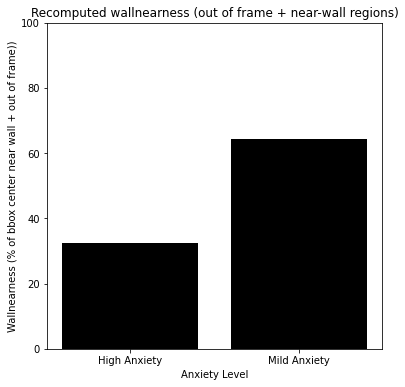

In [39]:
 # plot a bar plot of the new wallnearness values:
plt.figure(figsize=(6, 6))
x = [0, 1]
y = [subject25_newwallnearness, subject17_newwallnearness]
labels = ['High Anxiety', 'Mild Anxiety']

bar_width = 0.8
plt.bar(x, y, color='black', width=bar_width)
plt.title('Recomputed wallnearness (out of frame + near-wall regions)')
plt.ylabel('Wallnearness (% of bbox center near wall + out of frame))')
plt.xlabel('Anxiety Level')
plt.ylim(0,100)

plt.xticks(x, labels)  # map numerical x-values to categorical labels
plt.savefig('/Users/felipeparodi/Documents/projects/open-phen/data/new_wallnearness.pdf')

In [62]:
# Coordinates of the top-left and bottom-right corners of the new rectangle
top_left = (280, 250)
bottom_right = (410, 380)

# Define the new region as a rectangle
new_region = np.array([top_left, (bottom_right[0], top_left[1]), bottom_right, (top_left[0], bottom_right[1])])

# Draw the rectangle on the image
cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

# Display the image

ct = 0
for i in range(len(centers25)):
    if cv2.pointPolygonTest(new_region, (centers25[i][0], centers25[i][1]), False) >= 0:
        ct += 1

ct_17 = 0
for i in range(len(centers17)):
    if cv2.pointPolygonTest(new_region, (centers17[i][0], centers17[i][1]), False) >= 0:
        ct_17 += 1
sub25_centeredness = (ct/len(centers25)) * 100
sub17_centeredness = (ct_17/len(centers17)) * 100
print('Percentage of points in new region for participant 25: ', sub25_centeredness)
print('Percentage of points in new region for participant 17: ', sub17_centeredness)

Percentage of points in new region for participant 25:  20.204790638142256
Percentage of points in new region for participant 17:  3.5690235690235688


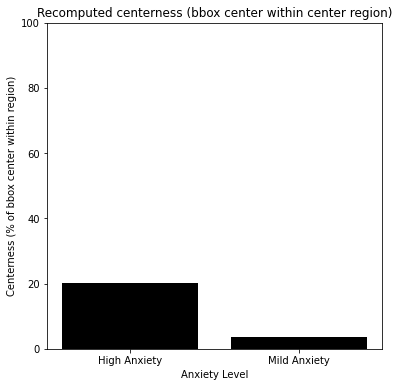

In [66]:
#  # plot a bar plot of the new wallnearness values:
plt.figure(figsize=(6, 6))
x = [0, 1]
y = [sub25_centeredness, sub17_centeredness]
labels = ['High Anxiety', 'Mild Anxiety']

bar_width = 0.8
plt.bar(x, y, color='black', width=bar_width)
plt.title('Recomputed centerness (bbox center within center region)')
plt.ylabel('Centerness (% of bbox center within region)')
plt.xlabel('Anxiety Level')
plt.ylim(0,100)

plt.xticks(x, labels)  # map numerical x-values to categorical labels
plt.savefig('/Users/felipeparodi/Documents/projects/open-phen/data/new_centerness.pdf')